In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io
import torch
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
from glob import glob

In [52]:
source_folders=glob('/content/drive/MyDrive/Assignment 4/*')
##source_folders.remove('/content/drive/MyDrive/Assignment 4/Assignment 4 - Huang Jiadeng.ipynb')
source_folders

['/content/drive/MyDrive/Assignment 4/normal_regions',
 '/content/drive/MyDrive/Assignment 4/cancer_regions',
 '/content/drive/MyDrive/Assignment 4/other',
 '/content/drive/MyDrive/Assignment 4/artifacts']

In [53]:
normal_regions_files=glob(source_folders[0]+"/*")
cancer_regions_files=glob(source_folders[1]+"/*")
other_files=glob(source_folders[2]+"/*")
artifactes_files=glob(source_folders[3]+"/*")

In [54]:
def ShowImg(f):
    img=io.imread(f)
    plt.imshow(img)

In [55]:
print(artifactes_files[0])
print(normal_regions_files[0])
print(cancer_regions_files[0])
print(other_files[0])

/content/drive/MyDrive/Assignment 4/artifacts/13833.png
/content/drive/MyDrive/Assignment 4/normal_regions/13640.png
/content/drive/MyDrive/Assignment 4/cancer_regions/852.png
/content/drive/MyDrive/Assignment 4/other/13180.png


In [56]:
files_set=[artifactes_files,cancer_regions_files,normal_regions_files,other_files]
x_train=artifactes_files[100:]+cancer_regions_files[100:]+normal_regions_files[100:]+other_files[100:]
x_test=artifactes_files[0:100]+cancer_regions_files[0:100]+normal_regions_files[0:100]+other_files[0:100]

In [57]:
y_train=np.full((1,len(artifactes_files[100:])),0)
y_train=np.append(y_train,np.full((1,len(cancer_regions_files[100:])),1))
y_train=np.append(y_train,np.full((1,len(normal_regions_files[100:])),2))
y_train=np.append(y_train,np.full((1,len(other_files[100:])),3))

In [58]:
len(y_train)==len(x_train)

True

In [59]:
y_test=np.append(np.full((1,100),0),np.full((1,100),1))
y_test=np.append(y_test,np.full((1,100),2))
y_test=np.append(y_test,np.full((1,100),3))

In [60]:
len(x_test)==len(y_test)

True

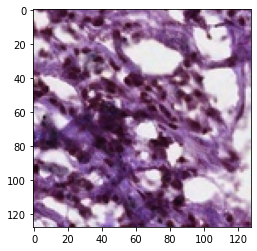

In [61]:
ShowImg(files_set[0][0])

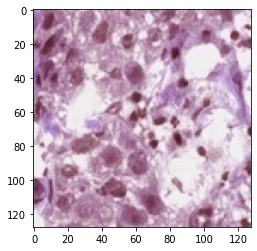

In [62]:
ShowImg(files_set[1][0])

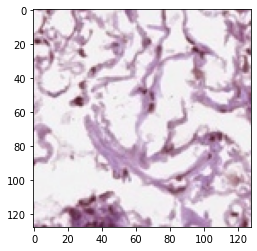

In [63]:
ShowImg(files_set[2][0])

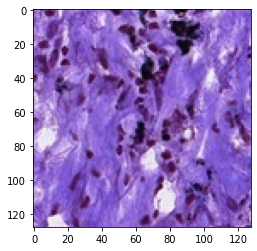

In [64]:
ShowImg(files_set[3][0])

In [65]:
len(x_train)

6529

In [66]:
len(x_test)

400

In [67]:
def x_to_data(X):
    xlist=[]
    i=0
    for x in X:
      print(i)
      img=io.imread(x)
      img=np.swapaxes(img,0,2)
      img=np.swapaxes(img,1,2)
      xlist.append(img)
      i+=1
    return xlist

In [ ]:
x_train=x_to_data(x_train)

Streaming output truncated to the last 5000 lines.
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718

In [ ]:
x_train_tensor=torch.tensor(x_train).float()
x_train_tensor.shape

torch.Size([6529, 3, 128, 128])

In [73]:
x_test_tensor=torch.tensor(x_to_data(x_test)).float()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [74]:
y_train_tensor=torch.tensor(y_train)

## Base CNN

In [ ]:
class Model_BaseCNN(torch.nn.Module):
    def __init__(self):
        super(Model_BaseCNN, self).__init__()

        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(3, 6, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            torch.nn.Conv2d(6, 12, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(12, 24, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(24, 48, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = torch.nn.Sequential(
            torch.nn.Linear(3072, 2048),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(2048, 1024),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(1024,512),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(512,100),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(100,4),
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

## Train by non-batch-divided & inbalanced dataset

In [ ]:
model=Model_BaseCNN()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = torch.nn.CrossEntropyLoss()

for i in range(400):
    optimizer.zero_grad()
    
    prediction = model(x_train_tensor)
    #print(prediction.dtype)
    loss = loss_func(prediction, y_train_tensor.long())
    
    # Back propagation for loss
    loss.backward()
    # Optimize parameter based on the least loss
    optimizer.step()

    #if i % 20 == 0:
    print("Time={} Loss={}".format(i, loss.data.numpy()))

Time=0 Loss=1.3261878490447998
Time=1 Loss=5.08405065536499
Time=2 Loss=2.478739023208618
Time=3 Loss=1.2974077463150024
Time=4 Loss=1.2687753438949585
Time=5 Loss=1.2323075532913208
Time=6 Loss=1.2125458717346191
Time=7 Loss=1.2275676727294922
Time=8 Loss=1.2141430377960205
Time=9 Loss=1.2072335481643677
Time=10 Loss=1.2057653665542603
Time=11 Loss=1.2027920484542847
Time=12 Loss=1.1930841207504272
Time=13 Loss=1.1813099384307861
Time=14 Loss=1.1681050062179565
Time=15 Loss=1.1439497470855713
Time=16 Loss=1.1073310375213623
Time=17 Loss=1.0712995529174805
Time=18 Loss=1.0348020792007446
Time=19 Loss=1.2024755477905273
Time=20 Loss=1.1433912515640259
Time=21 Loss=1.226965308189392
Time=22 Loss=1.1353182792663574
Time=23 Loss=0.9955810308456421
Time=24 Loss=1.1841922998428345
Time=25 Loss=1.04377281665802
Time=26 Loss=1.0295675992965698
Time=27 Loss=1.0750826597213745
Time=28 Loss=1.0725070238113403
Time=29 Loss=1.0172958374023438
Time=30 Loss=0.9778468012809753
Time=31 Loss=1.039903879

In [ ]:
test_pred = model(x_test_tensor)
res =test_pred.data
y_pred=torch.max(res,1)[1]
y_pred

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [69]:
def PrintReport(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred, target_names=['Artifactes','Cancer Regions','Normal Regions','Others'] ))
  sns.heatmap(cm, annot=True,fmt='g',cmap ='Reds',xticklabels=['Artifactes','Cancer Regions','Normal Regions','Others'],yticklabels=['Artifactes','Cancer Regions','Normal Regions','Others'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    Artifactes       0.70      0.94      0.80       100
Cancer Regions       0.35      0.92      0.50       100
Normal Regions       0.00      0.00      0.00       100
        Others       0.00      0.00      0.00       100

      accuracy                           0.47       400
     macro avg       0.26      0.46      0.33       400
  weighted avg       0.26      0.47      0.33       400



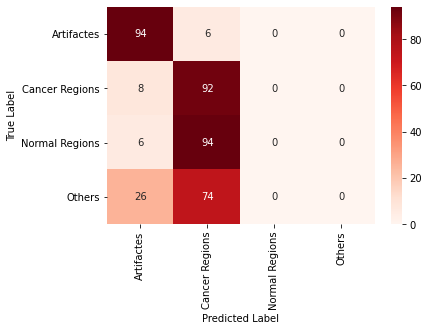

In [ ]:
PrintReport(y_test,y_pred)

In [ ]:
np.count_nonzero(y_train==0, axis = 0)

2280

In [ ]:
np.count_nonzero(y_train==1, axis = 0)

2778

In [ ]:
np.count_nonzero(y_train==2, axis = 0)

1087

In [ ]:
np.count_nonzero(y_train==3, axis = 0)

384

## Train by non-batch-divided & balanced dataset

In [75]:
x_train_2=artifactes_files[100:384]+cancer_regions_files[100:384]+normal_regions_files[100:384]+other_files[100:384]

In [76]:
y_train_2=np.full((1,len(artifactes_files[100:384])),0)
y_train_2=np.append(y_train_2,np.full((1,len(cancer_regions_files[100:384])),1))
y_train_2=np.append(y_train_2,np.full((1,len(normal_regions_files[100:384])),2))
y_train_2=np.append(y_train_2,np.full((1,len(other_files[100:384])),3))

In [77]:
len(x_train_2)==len(y_train_2)

True

In [78]:
x_train_2=x_to_data(x_train_2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [79]:
x_train_tensor=torch.tensor(x_train_2).float()
x_train_tensor.shape

torch.Size([1136, 3, 128, 128])

In [80]:
y_train_tensor=torch.tensor(y_train_2)

In [ ]:
model=Model_BaseCNN()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = torch.nn.CrossEntropyLoss()

for i in range(500):
    optimizer.zero_grad()
    
    prediction = model(x_train_tensor)
    #print(prediction.dtype)
    loss = loss_func(prediction, y_train_tensor.long())
    
    # Back propagation for loss
    loss.backward()
    # Optimize parameter based on the least loss
    optimizer.step()

    #if i % 20 == 0:
    print("Time={} Loss={}".format(i, loss.data.numpy()))

Time=0 Loss=1.3947601318359375
Time=1 Loss=5.844482898712158
Time=2 Loss=3.6333210468292236
Time=3 Loss=1.878753900527954
Time=4 Loss=1.6260488033294678
Time=5 Loss=1.4494861364364624
Time=6 Loss=1.525412917137146
Time=7 Loss=1.4028092622756958
Time=8 Loss=1.3988925218582153
Time=9 Loss=1.4093302488327026
Time=10 Loss=1.3885914087295532
Time=11 Loss=1.3858622312545776
Time=12 Loss=1.3885477781295776
Time=13 Loss=1.3861445188522339
Time=14 Loss=1.381372332572937
Time=15 Loss=1.379128098487854
Time=16 Loss=1.377198338508606
Time=17 Loss=1.3748018741607666
Time=18 Loss=1.3657938241958618
Time=19 Loss=1.3592420816421509
Time=20 Loss=1.3509377241134644
Time=21 Loss=1.3360546827316284
Time=22 Loss=1.3226879835128784
Time=23 Loss=1.3038699626922607
Time=24 Loss=1.2756352424621582
Time=25 Loss=1.2438963651657104
Time=26 Loss=1.2068071365356445
Time=27 Loss=1.1713056564331055
Time=28 Loss=1.129938006401062
Time=29 Loss=1.1105296611785889
Time=30 Loss=1.1393903493881226
Time=31 Loss=1.0908426046

In [ ]:
test_pred = model(x_test_tensor)
res =test_pred.data
y_pred=torch.max(res,1)[1]
y_pred

tensor([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 3, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
        3, 1, 1, 1, 2, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
        1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2,
        1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3,
        3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 1, 2, 2, 2, 1, 2, 2, 3, 0, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 3,
        2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1, 2, 2, 1, 2, 1, 3, 1, 2, 2,
        2, 3, 2, 2, 2, 0, 2, 1, 1, 1, 1,

                precision    recall  f1-score   support

    Artifactes       0.81      0.87      0.84       100
Cancer Regions       0.64      0.72      0.68       100
Normal Regions       0.61      0.62      0.61       100
        Others       0.81      0.64      0.72       100

      accuracy                           0.71       400
     macro avg       0.72      0.71      0.71       400
  weighted avg       0.72      0.71      0.71       400



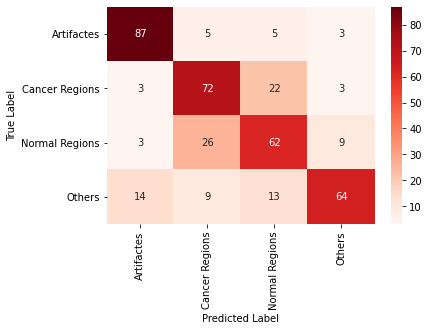

In [ ]:
PrintReport(y_test,y_pred)

## VGG(without batch normalization layers)

In [40]:
class Model_VGG(torch.nn.Module):
    def __init__(self):
        super(Model_VGG, self).__init__()

        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(3, 32, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            torch.nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(64, 128, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(128, 512, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = torch.nn.Sequential(
            torch.nn.Linear(32768, 4096),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(4096, 1000),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(1000,4),
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [81]:
cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(3, 32, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            torch.nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(64, 128, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(128, 512, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )

In [83]:
test=cnn_layers(x_train_tensor[0:1])
test.shape

torch.Size([1, 512, 8, 8])

## Straight forward 1 pass training
### Batch size = training data size
### Epoch = 500

## Using balanced training dataset

In [42]:
model=Model_VGG()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = torch.nn.CrossEntropyLoss()

for i in range(500):
    optimizer.zero_grad()
    
    prediction = model(x_train_tensor_2)
    #print(prediction.dtype)
    loss = loss_func(prediction, y_train_tensor_2.long())
    
    # Back propagation for loss
    loss.backward()
    # Optimize parameter based on the least loss
    optimizer.step()

    #if i % 20 == 0:
    print("Time={} Loss={}".format(i, loss.data.numpy()))

Time=0 Loss=1.6510579586029053
Time=1 Loss=1519.092041015625
Time=2 Loss=38.11382293701172
Time=3 Loss=5.7652997970581055
Time=4 Loss=7.709152698516846
Time=5 Loss=3.9204914569854736
Time=6 Loss=2.163144111633301
Time=7 Loss=1.367354154586792
Time=8 Loss=1.542682409286499
Time=9 Loss=1.3706306219100952
Time=10 Loss=1.3012572526931763
Time=11 Loss=1.268066167831421
Time=12 Loss=1.185172438621521
Time=13 Loss=1.4048126935958862
Time=14 Loss=1.3536628484725952
Time=15 Loss=1.48165762424469
Time=16 Loss=1.4830979108810425
Time=17 Loss=1.4343485832214355
Time=18 Loss=1.3682546615600586
Time=19 Loss=1.320314884185791
Time=20 Loss=1.3682284355163574
Time=21 Loss=1.2886161804199219
Time=22 Loss=1.2787840366363525
Time=23 Loss=1.2299104928970337
Time=24 Loss=1.2152786254882812
Time=25 Loss=3.024287700653076
Time=26 Loss=1.3459570407867432
Time=27 Loss=1.3410727977752686
Time=28 Loss=1.2347314357757568
Time=29 Loss=1.3300330638885498
Time=30 Loss=1.2104703187942505
Time=31 Loss=1.100330591201782

In [23]:
def Predict(Model,X):
    test_pred = Model(X)
    res =test_pred.data
    y_pred=torch.max(res,1)[1]
    return y_pred

                precision    recall  f1-score   support

    Artifactes       0.86      0.95      0.90       100
Cancer Regions       0.83      0.81      0.82       100
Normal Regions       0.82      0.74      0.78       100
        Others       0.90      0.91      0.91       100

      accuracy                           0.85       400
     macro avg       0.85      0.85      0.85       400
  weighted avg       0.85      0.85      0.85       400



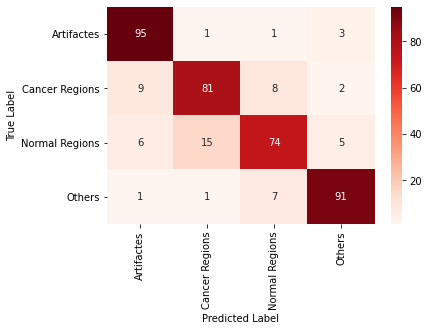

In [49]:
y_pred=Predict(model,x_test_tensor)
PrintReport(y_test,y_pred)

In [24]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred)

0.8525

In [57]:
for i in range(0,4):
    print(np.count_nonzero(y_train_2==i, axis = 0))

284
284
284
284


In [25]:
import torch.utils.data as Data

In [26]:
def PrepareTrainData(x,y):
    traindata=[]
    for i in range(0,len(x)):
        traindata.append([x[i],y[i]])
    return traindata

In [27]:
train_data=PrepareTrainData(x_train_tensor,y_train_tensor)
train_data_2=PrepareTrainData(x_train_tensor_2,y_train_tensor_2)

## Train by batch
## Loader 1: using unbalanced training data, batch size = 40
## Loader 2: using balanced training data, batch size = 40

In [28]:

loader = Data.DataLoader(
    dataset=train_data,      # torch TensorDataset format
    batch_size=40,      # ����������
    shuffle=True,               # �Ƿ������������
    num_workers=2,              # ���ڼ������ݵ��ӽ���
)


In [110]:
model=Model_VGG()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = torch.nn.CrossEntropyLoss()

## Loader 1

In [111]:
for epoch in range(20):  # loop over the dataset multiple times
    print("Epoch {}".format(epoch+1))
    for i, data in enumerate(loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        prediction = model(inputs)
        loss = loss_func(prediction,labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        if (i+1) % 10 == 0:
            print("Epoch={} Time={} Loss={}".format(epoch+1,i+1, loss.data.numpy()))  

Epoch 1
Epoch=1 Time=10 Loss=1.2934852838516235
Epoch=1 Time=20 Loss=1.2798627614974976
Epoch=1 Time=30 Loss=1.4701944589614868
Epoch=1 Time=40 Loss=0.7731026411056519
Epoch=1 Time=50 Loss=0.7384086847305298
Epoch=1 Time=60 Loss=0.8816522359848022
Epoch=1 Time=70 Loss=0.9223553538322449
Epoch=1 Time=80 Loss=0.7623755931854248
Epoch=1 Time=90 Loss=0.5227242112159729
Epoch=1 Time=100 Loss=0.912588894367218
Epoch=1 Time=110 Loss=0.7743285894393921
Epoch=1 Time=120 Loss=0.38807252049446106
Epoch=1 Time=130 Loss=0.6930767297744751
Epoch=1 Time=140 Loss=0.8183576464653015
Epoch=1 Time=150 Loss=0.5444386005401611
Epoch=1 Time=160 Loss=0.4019320607185364
Epoch 2
Epoch=2 Time=10 Loss=0.7122635245323181
Epoch=2 Time=20 Loss=0.40359702706336975
Epoch=2 Time=30 Loss=0.41943055391311646
Epoch=2 Time=40 Loss=0.574928879737854
Epoch=2 Time=50 Loss=0.4133874773979187
Epoch=2 Time=60 Loss=0.4462299942970276
Epoch=2 Time=70 Loss=0.6319323778152466
Epoch=2 Time=80 Loss=1.113118290901184
Epoch=2 Time=90 L

                precision    recall  f1-score   support

    Artifactes       0.82      0.97      0.89       100
Cancer Regions       0.83      0.90      0.86       100
Normal Regions       0.71      0.85      0.78       100
        Others       1.00      0.53      0.69       100

      accuracy                           0.81       400
     macro avg       0.84      0.81      0.80       400
  weighted avg       0.84      0.81      0.80       400



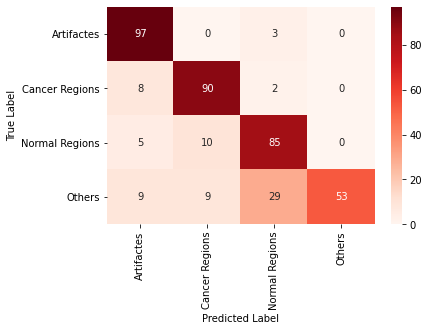

In [112]:
y_pred=Predict(model,x_test_tensor)
PrintReport(y_test,y_pred)

## Loader 2

In [29]:

loader_2 = Data.DataLoader(
    dataset=train_data_2,      # torch TensorDataset format
    batch_size=40,      # ����������
    shuffle=True,               # �Ƿ������������
    num_workers=2,              # ���ڼ������ݵ��ӽ���
)


In [114]:
model=Model_VGG()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = torch.nn.CrossEntropyLoss()

## epoch = 20

In [115]:
for epoch in range(20):  # loop over the dataset multiple times
    print("Epoch {}".format(epoch+1))
    for i, data in enumerate(loader_2, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        prediction = model(inputs)
        loss = loss_func(prediction,labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        if (i+1) % 10 == 0:
            print("Epoch={} Time={} Loss={}".format(epoch+1,i+1, loss.data.numpy()))  

Epoch 1
Epoch=1 Time=10 Loss=2.299450397491455
Epoch=1 Time=20 Loss=1.4899911880493164
Epoch 2
Epoch=2 Time=10 Loss=1.0151602029800415
Epoch=2 Time=20 Loss=1.017962098121643
Epoch 3
Epoch=3 Time=10 Loss=1.073127031326294
Epoch=3 Time=20 Loss=0.8278266191482544
Epoch 4
Epoch=4 Time=10 Loss=1.0741231441497803
Epoch=4 Time=20 Loss=1.0721564292907715
Epoch 5
Epoch=5 Time=10 Loss=0.9538301229476929
Epoch=5 Time=20 Loss=0.8536734580993652
Epoch 6
Epoch=6 Time=10 Loss=0.5253232717514038
Epoch=6 Time=20 Loss=0.7270690202713013
Epoch 7
Epoch=7 Time=10 Loss=0.5969606637954712
Epoch=7 Time=20 Loss=0.5122968554496765
Epoch 8
Epoch=8 Time=10 Loss=0.4009634554386139
Epoch=8 Time=20 Loss=0.5629273653030396
Epoch 9
Epoch=9 Time=10 Loss=0.4127507209777832
Epoch=9 Time=20 Loss=0.5151644945144653
Epoch 10
Epoch=10 Time=10 Loss=0.5071219205856323
Epoch=10 Time=20 Loss=0.2087302953004837
Epoch 11
Epoch=11 Time=10 Loss=0.3792930543422699
Epoch=11 Time=20 Loss=0.5447567105293274
Epoch 12
Epoch=12 Time=10 Los

                precision    recall  f1-score   support

    Artifactes       0.83      0.96      0.89       100
Cancer Regions       0.88      0.68      0.77       100
Normal Regions       0.74      0.80      0.77       100
        Others       0.83      0.83      0.83       100

      accuracy                           0.82       400
     macro avg       0.82      0.82      0.82       400
  weighted avg       0.82      0.82      0.82       400



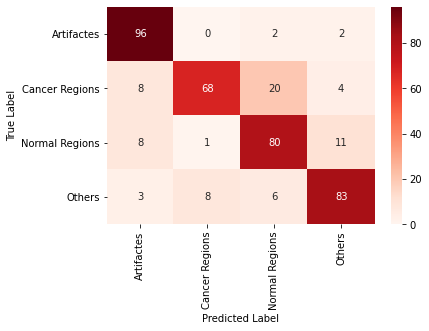

In [116]:
y_pred=Predict(model,x_test_tensor)
PrintReport(y_test,y_pred)

In [117]:
model=Model_VGG()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = torch.nn.CrossEntropyLoss()

## Epoch = 200

In [118]:
for epoch in range(200):  # loop over the dataset multiple times
    print("Epoch {}".format(epoch+1))
    for i, data in enumerate(loader_2, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        prediction = model(inputs)
        loss = loss_func(prediction,labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        if (i+1) % 10 == 0:
            print("Epoch={} Time={} Loss={}".format(epoch+1,i+1, loss.data.numpy()))  

Epoch 1
Epoch=1 Time=10 Loss=1.4076437950134277
Epoch=1 Time=20 Loss=1.3067612648010254
Epoch 2
Epoch=2 Time=10 Loss=1.3637518882751465
Epoch=2 Time=20 Loss=1.2449095249176025
Epoch 3
Epoch=3 Time=10 Loss=1.1538301706314087
Epoch=3 Time=20 Loss=1.222049355506897
Epoch 4
Epoch=4 Time=10 Loss=1.0898514986038208
Epoch=4 Time=20 Loss=0.9593073129653931
Epoch 5
Epoch=5 Time=10 Loss=0.9569476246833801
Epoch=5 Time=20 Loss=0.929733395576477
Epoch 6
Epoch=6 Time=10 Loss=0.7636908292770386
Epoch=6 Time=20 Loss=0.7516072988510132
Epoch 7
Epoch=7 Time=10 Loss=0.7278227806091309
Epoch=7 Time=20 Loss=0.5565165281295776
Epoch 8
Epoch=8 Time=10 Loss=0.46683087944984436
Epoch=8 Time=20 Loss=0.8499190211296082
Epoch 9
Epoch=9 Time=10 Loss=0.5444970726966858
Epoch=9 Time=20 Loss=0.4176355302333832
Epoch 10
Epoch=10 Time=10 Loss=0.5541265606880188
Epoch=10 Time=20 Loss=0.4957643151283264
Epoch 11
Epoch=11 Time=10 Loss=0.5949918627738953
Epoch=11 Time=20 Loss=0.5684143900871277
Epoch 12
Epoch=12 Time=10 L

                precision    recall  f1-score   support

    Artifactes       0.88      0.80      0.84       100
Cancer Regions       0.70      0.48      0.57       100
Normal Regions       0.62      0.86      0.72       100
        Others       0.75      0.77      0.76       100

      accuracy                           0.73       400
     macro avg       0.74      0.73      0.72       400
  weighted avg       0.74      0.73      0.72       400



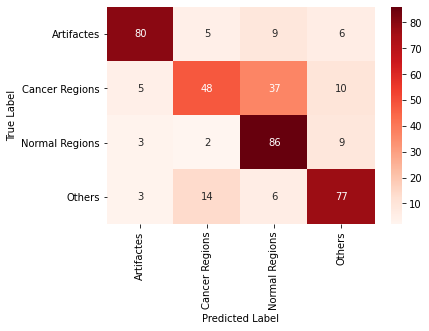

In [119]:
y_pred=Predict(model,x_test_tensor)
PrintReport(y_test,y_pred)

## VGG(With batch normalization layers)

In [30]:
class Model_VGG_v2(torch.nn.Module):
    def __init__(self):
        super(Model_VGG_v2, self).__init__()

        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(3, 32, kernel_size=2, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            torch.nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(64, 128, kernel_size=2, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(128, 512, kernel_size=2, stride=1, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = torch.nn.Sequential(
            torch.nn.Linear(32768, 4096),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(4096, 1000),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(1000,4),
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [31]:
x_train_tensor_2.shape

torch.Size([1136, 3, 128, 128])

In [125]:
x_val=x_train_tensor_2[0:50]+x_train_tensor_2[284:284+50]+x_train_tensor_2[284*2:284*2+50]+x_train_tensor_2[284*3:284*3+50]
y_val=y_train_tensor[0:50]+y_train_tensor[284:284+50]+y_train_tensor[284*2:284*2+50]+y_train_tensor[284*3:284*3+50]
x_train_3=x_train_tensor_2[50:284]+x_train_tensor_2[50+284:284*2]+x_train_tensor_2[50+284*2:284*3]+x_train_tensor_2[50+284*3:284*4]
y_train_3=y_train_tensor[50:284]+y_train_tensor[50+284:284*2]+y_train_tensor[50+284*2:284*3]+y_train_tensor[50+284*3:284*4]

In [32]:
training_loss=[]

model=Model_VGG_v2()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = torch.nn.CrossEntropyLoss()

## Straight forward 1 pass training
### Batch size = training data size
### Epoch = 500
### Manually early stopping

In [33]:
for i in range(500):
    optimizer.zero_grad()
    
    prediction = model(x_train_tensor_2)
    #print(prediction.dtype)
    loss = loss_func(prediction, y_train_tensor_2.long())
    
    # Back propagation for loss
    loss.backward()
    # Optimize parameter based on the least loss
    optimizer.step()

    training_loss.append(loss.data.numpy())

    #if i % 20 == 0:
    print("Time={} Loss={}".format(i, loss.data.numpy()))

Time=0 Loss=1.402166724205017
Time=1 Loss=77.90646362304688
Time=2 Loss=49.854652404785156
Time=3 Loss=51.321407318115234
Time=4 Loss=41.207740783691406
Time=5 Loss=14.898131370544434
Time=6 Loss=9.123043060302734
Time=7 Loss=5.661043643951416
Time=8 Loss=3.9141085147857666
Time=9 Loss=2.6810078620910645
Time=10 Loss=1.7918131351470947
Time=11 Loss=1.3005543947219849
Time=12 Loss=1.0729541778564453
Time=13 Loss=0.9029131531715393
Time=14 Loss=0.8215206861495972
Time=15 Loss=0.9309480786323547
Time=16 Loss=0.8403360247612
Time=17 Loss=0.7572667002677917
Time=18 Loss=0.6744207739830017
Time=19 Loss=0.6260309219360352
Time=20 Loss=0.6249608397483826
Time=21 Loss=0.6119391322135925
Time=22 Loss=0.5624377131462097
Time=23 Loss=0.5678524971008301
Time=24 Loss=0.5562956929206848
Time=25 Loss=0.5379063487052917
Time=26 Loss=0.5164526700973511
Time=27 Loss=0.4985369145870209
Time=28 Loss=0.48370361328125
Time=29 Loss=0.48996207118034363
Time=30 Loss=0.46859756112098694
Time=31 Loss=0.4603875279

KeyboardInterrupt: 

In [35]:
torch.save(model,'model_vgg_v2.pkl')

                precision    recall  f1-score   support

    Artifactes       0.93      0.97      0.95       100
Cancer Regions       0.92      0.89      0.90       100
Normal Regions       0.89      0.92      0.91       100
        Others       0.95      0.91      0.93       100

      accuracy                           0.92       400
     macro avg       0.92      0.92      0.92       400
  weighted avg       0.92      0.92      0.92       400



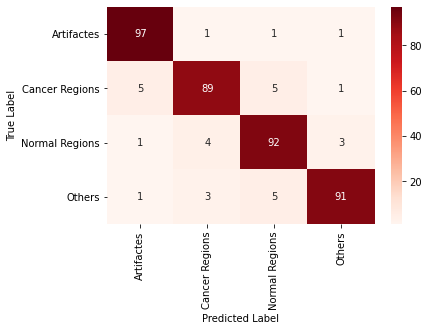

In [38]:

y_pred=Predict(model,x_test_tensor)
PrintReport(y_test,y_pred)

## Loader 1
## Epoch = 30

In [39]:
model=Model_VGG_v2()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = torch.nn.CrossEntropyLoss()

In [40]:
for epoch in range(30):  # loop over the dataset multiple times
    print("Epoch {}".format(epoch+1))
    for i, data in enumerate(loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        prediction = model(inputs)
        loss = loss_func(prediction,labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        if (i+1) % 10 == 0:
            print("Epoch={} Time={} Loss={}".format(epoch+1,i+1, loss.data.numpy()))  

1 Time=160 Loss=0.31671467423439026
Epoch 2
Epoch=2 Time=10 Loss=0.35324305295944214
Epoch=2 Time=20 Loss=0.7199868559837341
Epoch=2 Time=30 Loss=0.4367460608482361
Epoch=2 Time=40 Loss=0.45978206396102905
Epoch=2 Time=50 Loss=0.23090648651123047
Epoch=2 Time=60 Loss=0.3127550780773163
Epoch=2 Time=70 Loss=0.3434954285621643
Epoch=2 Time=80 Loss=0.28195175528526306
Epoch=2 Time=90 Loss=0.25476422905921936
Epoch=2 Time=100 Loss=0.25378647446632385
Epoch=2 Time=110 Loss=0.5049790143966675
Epoch=2 Time=120 Loss=0.4789125323295593
Epoch=2 Time=130 Loss=0.28891733288764954
Epoch=2 Time=140 Loss=0.4566524624824524
Epoch=2 Time=150 Loss=0.20565590262413025
Epoch=2 Time=160 Loss=0.19127723574638367
Epoch 3
Epoch=3 Time=10 Loss=0.26076793670654297
Epoch=3 Time=20 Loss=0.3309072256088257
Epoch=3 Time=30 Loss=0.5038052201271057
Epoch=3 Time=40 Loss=0.07815752923488617
Epoch=3 Time=50 Loss=0.15783676505088806
Epoch=3 Time=60 Loss=0.22551484405994415
Epoch=3 Time=70 Loss=0.2581067383289337
Epoch=3 

                precision    recall  f1-score   support

    Artifactes       0.87      0.97      0.92       100
Cancer Regions       0.78      0.97      0.87       100
Normal Regions       0.93      0.79      0.85       100
        Others       0.97      0.78      0.87       100

      accuracy                           0.88       400
     macro avg       0.89      0.88      0.88       400
  weighted avg       0.89      0.88      0.88       400



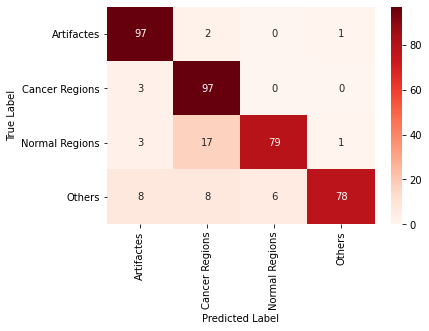

In [41]:
y_pred=Predict(model,x_test_tensor)
PrintReport(y_test,y_pred)

## Loader 2

In [42]:
model=Model_VGG_v2()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = torch.nn.CrossEntropyLoss()

In [43]:
for epoch in range(70):  # loop over the dataset multiple times
    print("Epoch {}".format(epoch+1))
    for i, data in enumerate(loader_2, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        prediction = model(inputs)
        loss = loss_func(prediction,labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        if (i+1) % 10 == 0:
            print("Epoch={} Time={} Loss={}".format(epoch+1,i+1, loss.data.numpy()))  

Epoch 1
Epoch=1 Time=10 Loss=1.313278317451477
Epoch=1 Time=20 Loss=0.8732102513313293
Epoch 2
Epoch=2 Time=10 Loss=0.4115130305290222
Epoch=2 Time=20 Loss=0.5779411196708679
Epoch 3
Epoch=3 Time=10 Loss=0.4330686628818512
Epoch=3 Time=20 Loss=0.3296891450881958
Epoch 4
Epoch=4 Time=10 Loss=0.5608757138252258
Epoch=4 Time=20 Loss=0.4917312264442444
Epoch 5
Epoch=5 Time=10 Loss=0.2523268163204193
Epoch=5 Time=20 Loss=0.11659077554941177
Epoch 6
Epoch=6 Time=10 Loss=0.8349918127059937
Epoch=6 Time=20 Loss=0.30855441093444824
Epoch 7
Epoch=7 Time=10 Loss=0.21461598575115204
Epoch=7 Time=20 Loss=0.6495997309684753
Epoch 8
Epoch=8 Time=10 Loss=0.35544341802597046
Epoch=8 Time=20 Loss=0.07422706484794617
Epoch 9
Epoch=9 Time=10 Loss=0.4202113151550293
Epoch=9 Time=20 Loss=0.10550294816493988
Epoch 10
Epoch=10 Time=10 Loss=0.5893640518188477
Epoch=10 Time=20 Loss=0.31182748079299927
Epoch 11
Epoch=11 Time=10 Loss=0.08441831171512604
Epoch=11 Time=20 Loss=0.38953566551208496
Epoch 12
Epoch=12 

                precision    recall  f1-score   support

    Artifactes       0.92      0.98      0.95       100
Cancer Regions       0.95      0.89      0.92       100
Normal Regions       0.90      0.89      0.89       100
        Others       0.92      0.93      0.93       100

      accuracy                           0.92       400
     macro avg       0.92      0.92      0.92       400
  weighted avg       0.92      0.92      0.92       400



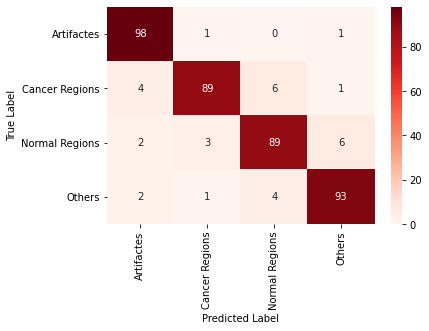

In [44]:
y_pred=Predict(model,x_test_tensor)
PrintReport(y_test,y_pred)

In [45]:
data=pd.read_csv('Classification Result.csv',index_col=0)
data

,Image Size,Model,Highest Accuracy
1,6589 Images(Imbalanced),Base CNN,0.47
2,1087 Images(Balanced),Base CNN,0.71
3,6589 Images(Imbalanced),VGG(Without Normalization),0.81
4,1087 Images(Balanced),VGG(Without Normalization),0.85
5,6589 Images(Imbalanced),VGG(With Normalization),0.88
6,1087 Images(Balanced),VGG(With Normalization),0.92


<AxesSubplot:xlabel='Image Size', ylabel='Highest Accuracy'>

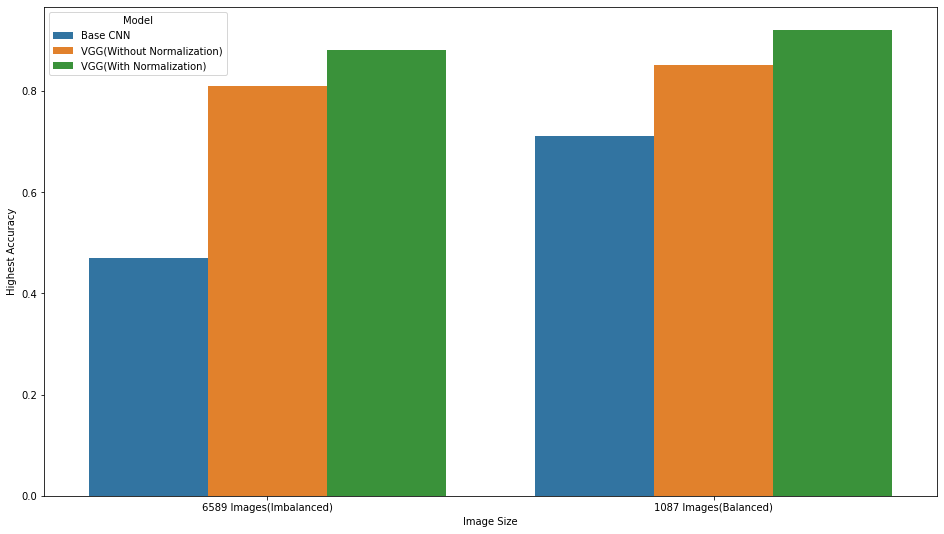

In [49]:
plt.figure(figsize=(16,9))
sns.barplot(x='Image Size',y='Highest Accuracy',hue='Model',data=data)